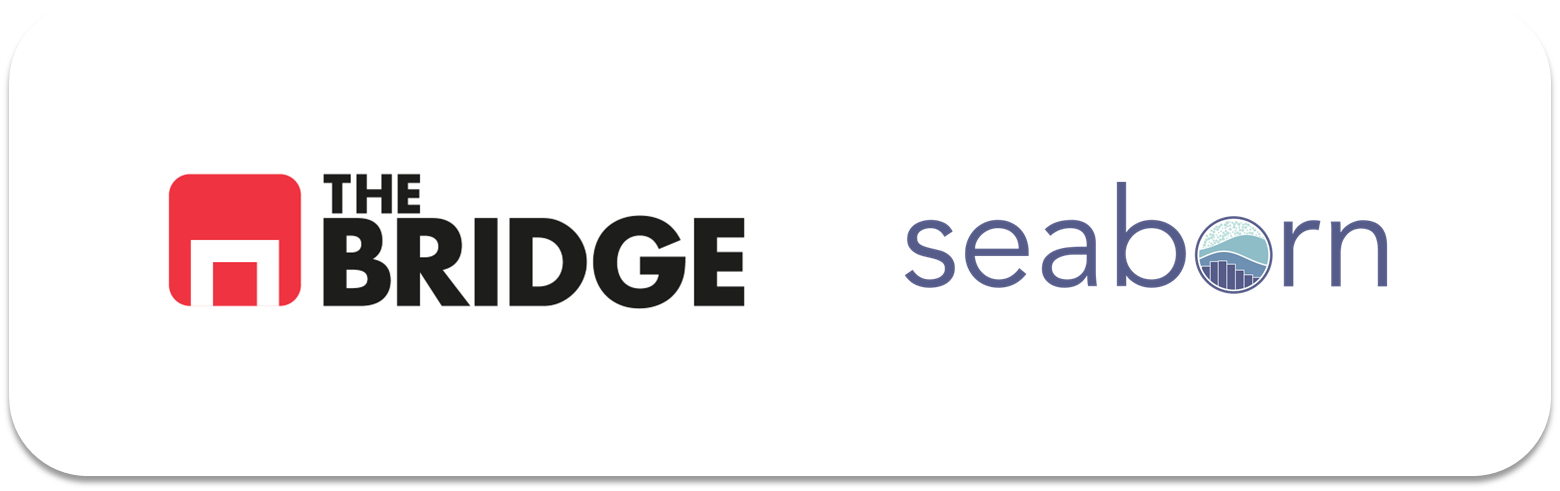

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [3]:
archivo = pd.read_csv(r'C:\DATA_SCIENCE\MASTER DATA SCIENCE\Prácticas Máster Data Science\Practicas_Data_Science\Prácticas Python\Ejercicios Sprint 8 - Visualización y Presentación\Unidad_02\Practica_Obligatoria\data\california_cities.csv')

df_california = archivo.copy()

df_california.head(5)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [4]:
df_california.isnull().sum()

Unnamed: 0             0
city                   0
latd                   0
longd                  0
elevation_m           48
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

In [5]:
df_california.drop(columns=['elevation_m', 'elevation_ft', 'area_total_sq_mi', 'area_water_sq_mi',\
                             'area_total_km2', 'area_land_km2', 'area_water_km2', 'area_water_percent'],errors='ignore', inplace=True)

df_california.head(5)

,Unnamed: 0,city,latd,longd,population_total,area_land_sq_mi
0,0,Adelanto,34.576111,-117.432778,31765,56.009
1,1,AgouraHills,34.153333,-118.761667,20330,7.793
2,2,Alameda,37.756111,-122.274444,75467,10.611
3,3,Albany,37.886944,-122.297778,18969,1.788
4,4,Alhambra,34.081944,-118.135000,83089,7.631


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

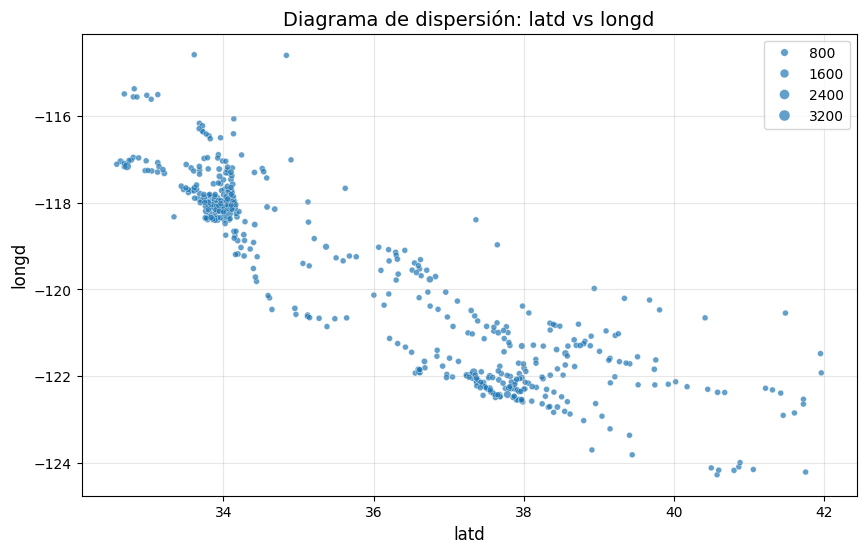

In [6]:
def scatter_plot(df, num_col_x, num_col_y, cat_col=None, size=None, scale=1):

    plt.figure(figsize=(10, 6))

    # Determinar el tamaño de los puntos
    if isinstance(size, str) and size in df.columns:
        sizes = df[size] * scale
    elif isinstance(size, (int, float)):
        sizes = size
    else:
        sizes = 100  # Tamaño por defecto si no se da un tamaño válido

    # Crear el scatter plot
    if cat_col and cat_col in df.columns:
        sns.scatterplot(
            data=df, x=num_col_x, y=num_col_y, hue=cat_col, size=sizes, palette="viridis", alpha=0.7
        )
    else:
        sns.scatterplot(data=df, x=num_col_x, y=num_col_y, size=sizes, alpha=0.7)

    # Añadir etiquetas y título
    plt.title(f"Diagrama de dispersión: {num_col_x} vs {num_col_y}", fontsize=14)
    plt.xlabel(num_col_x, fontsize=12)
    plt.ylabel(num_col_y, fontsize=12)
    plt.legend(loc="best")
    plt.grid(alpha=0.3)
    plt.show()

# Llamar a la función
scatter_plot(
    df=df_california,
    num_col_x="latd",
    num_col_y="longd",
    size="population_total",
    scale=1 / 1000
)


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

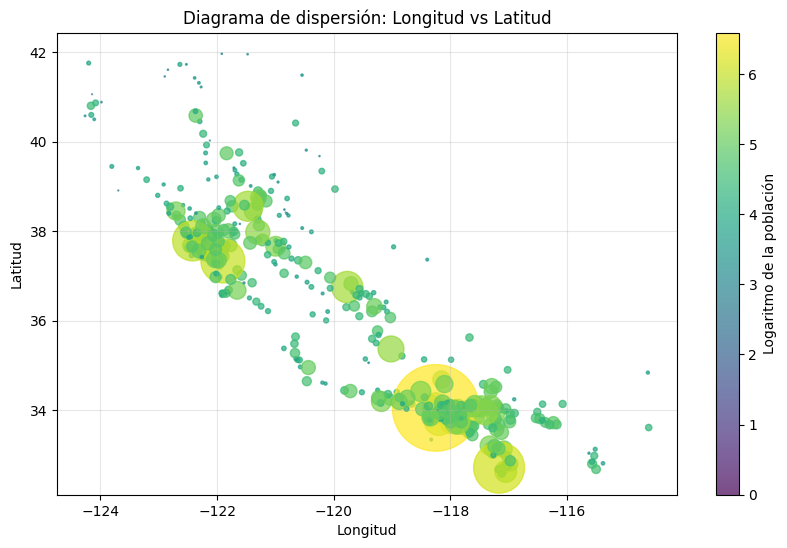

In [7]:
# Crear una nueva columna con el logaritmo decimal de la población
df_california['log_poblacion'] = np.log10(df_california['population_total'])

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=df_california['longd'],
    y=df_california['latd'],
    s=df_california['population_total'] / 1000,  # Escalar el tamaño de los puntos
    c=df_california['log_poblacion'],  # Usar el logaritmo de la población para el color
    cmap="viridis",
    alpha=0.7
)

# Añadir barra de colores
plt.colorbar(scatter, label="Logaritmo de la población")

# Añadir etiquetas y título
plt.title("Diagrama de dispersión: Longitud vs Latitud")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(alpha=0.3)
plt.show()

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

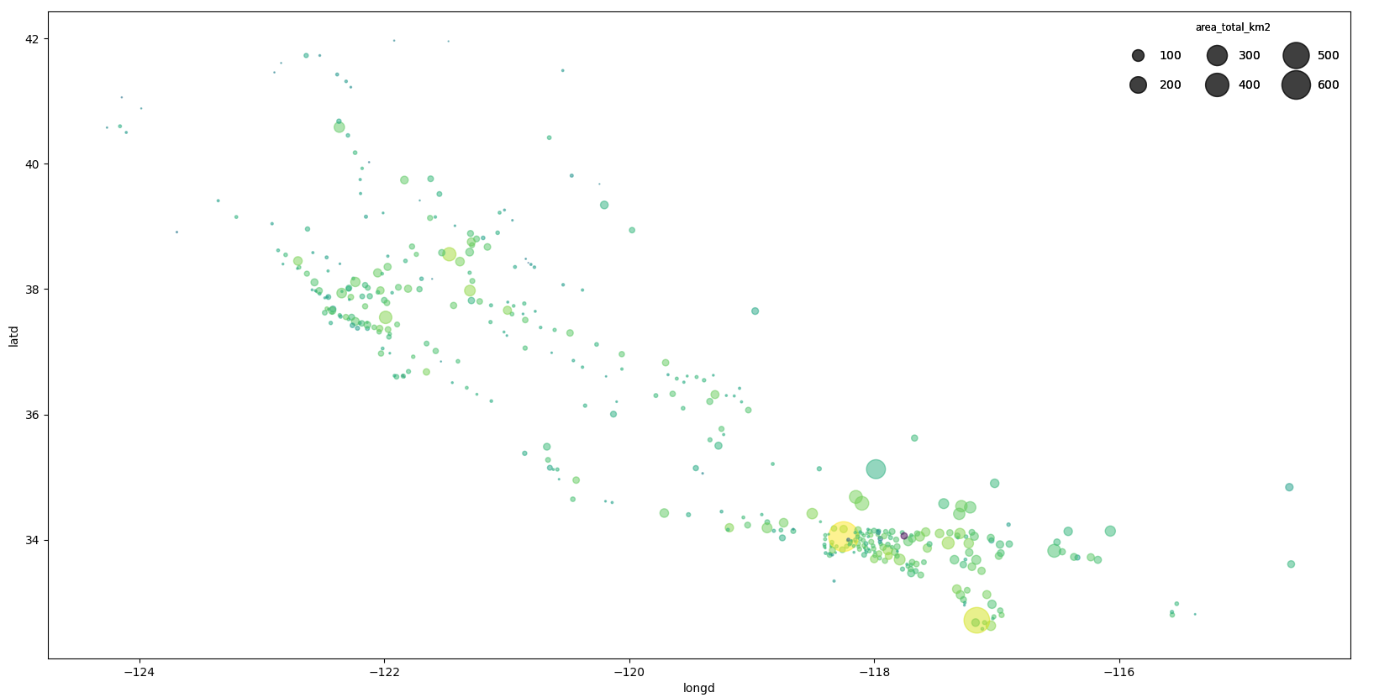

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [16]:
archivo_2 = pd.read_csv(r'C:\DATA_SCIENCE\MASTER DATA SCIENCE\Prácticas Máster Data Science\Practicas_Data_Science\Prácticas Python\Ejercicios Sprint 8 - Visualización y Presentación\Unidad_02\Ejercicios_Workout\data\titanic.csv')

df_titanic = archivo_2.copy()

df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
df_titanic.drop(columns=['deck', 'embarked'], errors='ignore', inplace=True)

In [19]:
df_titanic['age'].mean()

np.float64(29.69911764705882)

In [20]:
df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)



C:\Users\Joaquín\AppData\Local\Temp\ipykernel_32000\1489708111.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)


In [22]:
df_titanic['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [27]:
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace=True)

In [30]:
df_titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [35]:
df_titanic['alive'].value_counts(normalize=True)*100

alive
no     61.616162
yes    38.383838
Name: proportion, dtype: float64

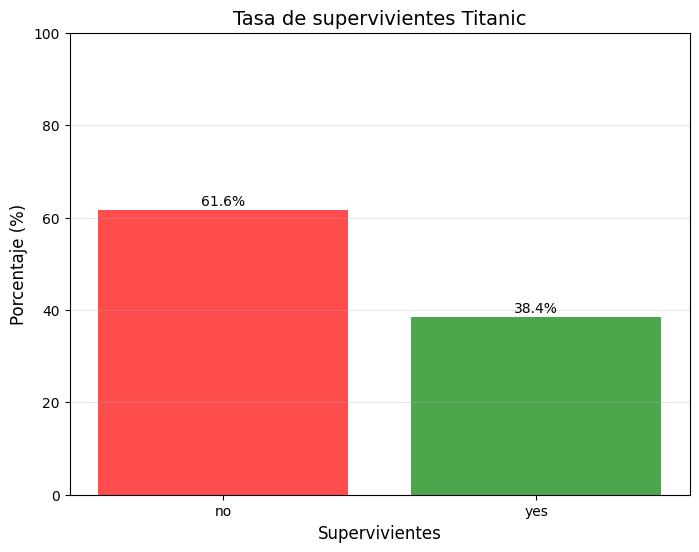

In [38]:
# Datos de ejemplo
data = {'no': 61.616162, 'yes': 38.383838}
labels = list(data.keys())
values = list(data.values())

# Crear el gráfico de barras con porcentajes encima de las columnas
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['red', 'green'], alpha=0.7)

# Añadir etiquetas y título
plt.title("Tasa de supervivientes Titanic", fontsize=14)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xlabel("Supervivientes", fontsize=12)
plt.ylim(0, 100)  # Escalar al rango de porcentaje
plt.grid(axis='y', alpha=0.3)

# Añadir los porcentajes encima de las barras
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{value:.1f}%", ha='center', fontsize=10)

# Mostrar el gráfico
plt.show()


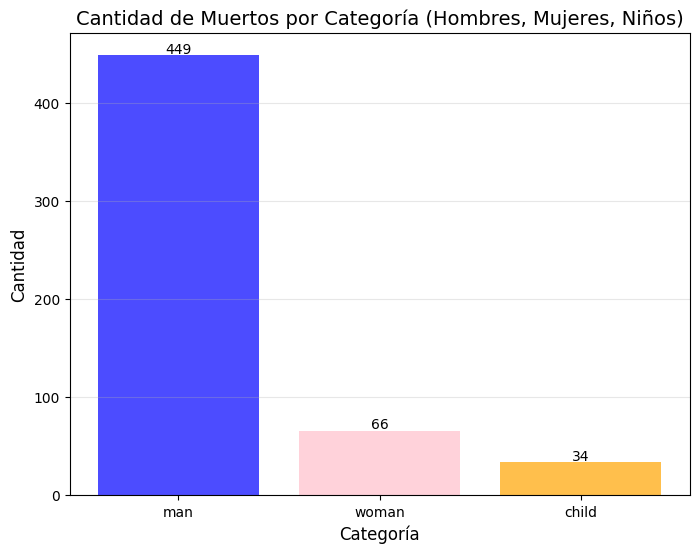

In [42]:
# Filtrar los datos para los no sobrevivientes ("alive" == "no")
no_supervivientes = df_titanic[df_titanic['alive'] == 'no']

# Contar la cantidad de hombres, mujeres y niños muertos
counts = no_supervivientes['who'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index, counts.values, color=['blue', 'pink', 'orange'], alpha=0.7)

# Añadir etiquetas y título
plt.title("Cantidad de Muertos por Categoría (Hombres, Mujeres, Niños)", fontsize=14)
plt.ylabel("Cantidad", fontsize=12)
plt.xlabel("Categoría", fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Añadir los valores encima de las barras
for bar, value in zip(bars, counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
             f"{value}", ha='center', fontsize=10)

# Mostrar el gráfico
plt.show()


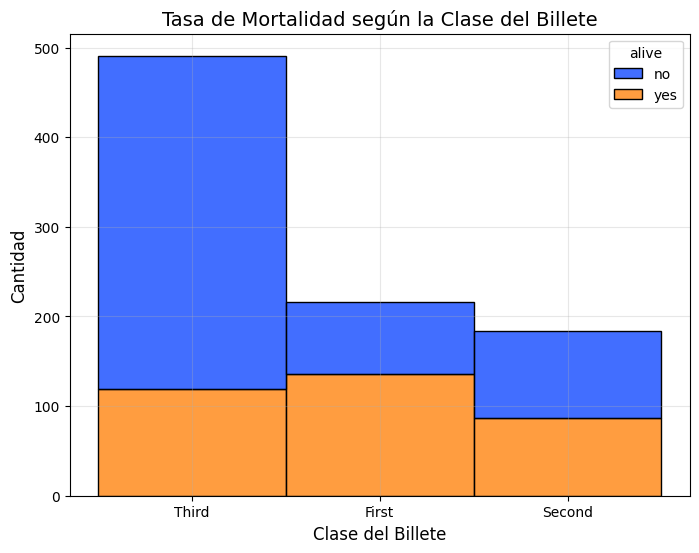

In [ ]:
# Crear un histograma para visualizar la mortalidad según la clase del billete usando directamente df_titanic
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df_titanic,
    x='class',
    hue='alive',  # Usar la columna 'alive' para mostrar vivos/muertos
    multiple='stack',
    palette='bright',
    bins=3
)

# Añadir etiquetas y título
plt.title("Tasa de Mortalidad según la Clase del Billete", fontsize=14)
plt.xlabel("Clase del Billete", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.grid(alpha=0.3)

# Mostrar el gráfico
plt.show()




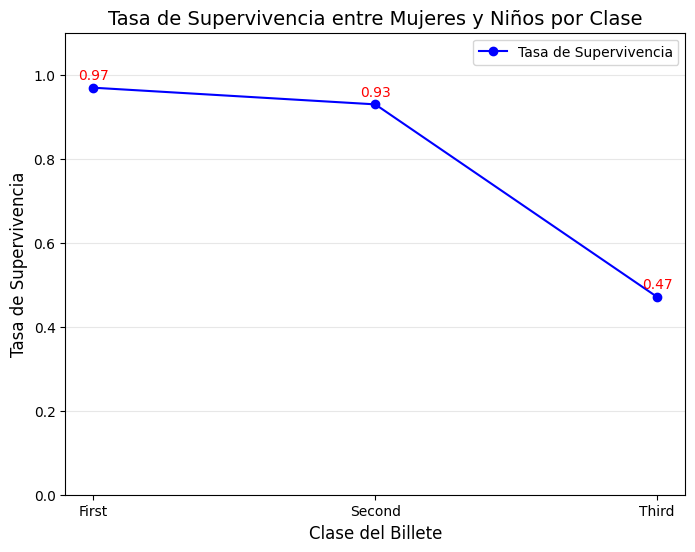

In [75]:
# Filtrar datos para mujeres y niños
mujer_niño = df_titanic[df_titanic['who'].isin(['woman', 'child'])]

# Calcular la tasa de supervivencia por clase para mujeres y niños
ratio = (
    mujer_niño[mujer_niño['alive'] == 'yes']
    .groupby('class')
    .size() / mujer_niño.groupby('class').size()
)

# Convertir a DataFrame para graficar
ratio_superviviencia_df = ratio.reset_index()
ratio_superviviencia_df.columns = ['Class', 'ratio']


# Crear un gráfico de líneas para visualizar la tasa de supervivencia entre mujeres y niños por clase
plt.figure(figsize=(8, 6))
plt.plot(ratio_superviviencia_df['Class'], ratio_superviviencia_df['ratio'], marker='o', linestyle='-', color='blue', label='Tasa de Supervivencia')

# Añadir etiquetas de los valores directamente en los puntos
for i, value in enumerate(ratio_superviviencia_df['ratio']):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10, color='red')

# Añadir etiquetas y título
plt.title("Tasa de Supervivencia entre Mujeres y Niños por Clase", fontsize=14)
plt.xlabel("Clase del Billete", fontsize=12)
plt.ylabel("Tasa de Supervivencia", fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Mostrar el gráfico
plt.show()



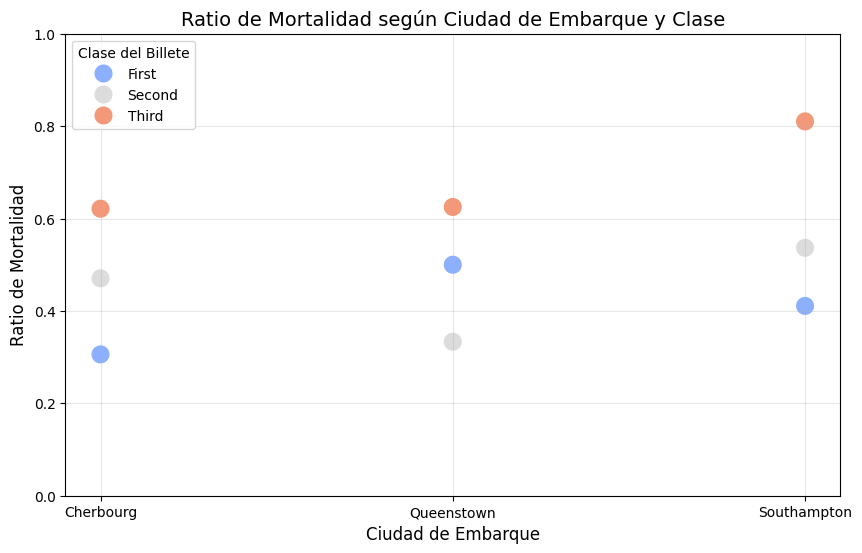

In [91]:
# Calcular el ratio de mortalidad según ciudad de embarque y clase
ratio_mortalidad_ciudad = (
    df_titanic[df_titanic['alive'] == 'no']
    .groupby(['embark_town', 'class'])
    .size() / df_titanic.groupby(['embark_town', 'class']).size()
).reset_index(name='Mortality Rate')

# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=ratio_mortalidad_ciudad,
    x='embark_town',
    y='Mortality Rate',
    hue='class',
    palette='coolwarm',
    alpha=1,
    s=200,
)

# Añadir etiquetas y título
plt.title("Ratio de Mortalidad según Ciudad de Embarque y Clase", fontsize=14)
plt.xlabel("Ciudad de Embarque", fontsize=12)
plt.ylabel("Ratio de Mortalidad", fontsize=12)
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.legend(title="Clase del Billete", loc='upper left')

# Mostrar el gráfico
plt.show()
